In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lora = np.fromfile('/home/daniel/lora_detector.f32', dtype = 'float32')[20:-2000]
rtty = np.fromfile('/home/daniel/fsk_detector.f32', dtype = 'float32')[20:-2000]

In [3]:
averaging = 300
nfft = 1024
samp_rate = 192e3
t0 = np.datetime64('2019-05-19T15:37:19')
step = nfft/samp_rate*averaging * 1e9 * np.timedelta64(1, 'ns')

In [4]:
def average(x, avg = averaging):
    return np.average(x[:x.size//avg*avg].reshape((-1,avg)), axis = 1)

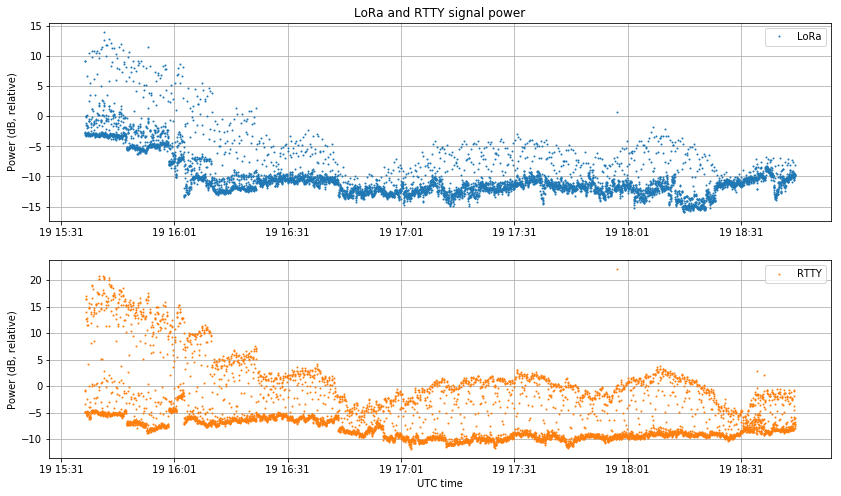

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (14,8))
t = t0 + step * np.arange(average(lora).size)
ax[0].plot(t, 10*np.log10(average(lora)), '.', markersize = 2)
ax[1].plot(t, 10*np.log10(average(rtty))+30, '.', markersize = 2, color = 'C1')
for a in ax:
    a.grid()
    a.set_ylabel('Power (dB, relative)')
ax[0].legend(['LoRa'])
ax[1].legend(['RTTY'])
ax[0].set_title('LoRa and RTTY signal power')
ax[1].set_xlabel('UTC time');